## 1. Previous Workflow

In [1]:
## True if you want to import data downloaded previusly
# flag_loading2 = True

## History Prices Interval:
# 1 = 5m
# 2 = 1h
# 3 = 1d
inter2 = 3

## Update history dispite it was downloaded today
flag_history_download2 = False

In [2]:
%run 4_TICKERS.ipynb


1. HISTORY

---------------
1.1 Header
---------------

Not loading updated files
Loading outdated files
Updating History Data, only once today
History interval: 1 DAY
Last operations file loaded
Last strategy file loaded
Market = portfolio_world_index_crypto_currencies_top1000_mcapT22022

---------------
1.2 Files Loading
---------------

HISTORY loaded
flag_history: False
GRAL DATA file loaded
Oudated STATS loaded
Oudated STATS_VAL loaded
Oudated EARNINGS loaded

---------------
1.3 Data Download
---------------

Stats data already gotten or not needed
Stats Val data already gotten or not needed
General data already gotten
EUR-USD downloaded
History data already gotten
Earnings data already gotten or no needed

---------------
1.4 Data Wrangling
---------------

Data already checked
Earnings data already edited or there are no earnings

---------------
1.6 Export
---------------

Nothing new to export
Nothing new to export
Nothing new to export
Nothing new to export
Nothing new to e

Box(children=(IntSlider(value=-365, description='Steps before', layout=Layout(width='30%'), max=-10, min=-2194…

Output()


---------------
2.2 DASHBOARD
---------------



Box(children=(Dropdown(description='Ticker', layout=Layout(width='12%'), options=('AAPL', 'BMW.DE', 'BTC-USD',…

Output()

Best Results SM data loaded | Best SM data loaded
Running Correlation Matrix....
...Done!


Box(children=(Dropdown(layout=Layout(width='10%'), options=('AAPL', 'BMW.DE', 'BTC-USD', 'ETH-USD', 'GOOGL', '…

Output()

Box(children=(Dropdown(layout=Layout(width='10%'), options=('NYE-EUR', 'AVAX-EUR', 'USDC-EUR', 'FSRA.F', 'TSCD…

Output()

Box(children=(Dropdown(layout=Layout(width='10%'), options=('NYE-EUR', 'AVAX-EUR', 'USDC-EUR', 'FSRA.F', 'TSCD…

Output()

In [3]:
%whos

Variable                      Type                Data/Info
-----------------------------------------------------------
Box                           MetaHasTraits       <class 'ipywidgets.widgets.widget_box.Box'>
Dash                          type                <class 'dash.dash.Dash'>
HTML                          type                <class 'IPython.core.display.HTML'>
IntProgress                   MetaHasTraits       <class 'ipywidgets.widget<...>.widget_int.IntProgress'>
Label                         MetaHasTraits       <class 'ipywidgets.widgets.widget_string.Label'>
Layout                        MetaHasTraits       <class 'ipywidgets.widgets.widget_layout.Layout'>
SMA1                          int                 18
SMA2                          int                 90
Ticker                        Text                Text(value='', layout=Lay<...>ription_width='initial'))
analysis_df                   DataFrame           Ticker        AAPL       <...>n[2194 rows x 63 columns]
an

In [4]:
%who_ls DataFrame

['analysis_df',
 'aux',
 'conv',
 'data',
 'data1',
 'data2y',
 'data2y_ret',
 'data_eps',
 'data_gral',
 'data_gral_top1000',
 'data_smopt_allticks',
 'data_stats',
 'data_stats_val',
 'eur_to_conv_df',
 'eurusd',
 'mat_corr_analysis_ticks',
 'mat_corr_new',
 'mat_corr_new2',
 'matcorr',
 'matcorr_data2y_ret',
 'operations_df',
 'results_analysis_ticks',
 'results_analysis_ticks_best',
 'results_ticks',
 'results_ticks_best',
 'ret_sdt',
 'returns',
 'returns_cartera',
 'std_data2y_ret',
 'strat_ma_cum_filt',
 'strategy_df',
 'tickers']

## 2. Import

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, Normalizer

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate, ShuffleSplit, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lasso, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline

## 3. Functions

In [6]:
def plot_learning_curves(model, X, y, test_size = 0.3, ax = "", poly = "", ylim1 = None, ylim2 = None, title = "Learning Curve"):
    """
    Input:
        * model
        * X
        * y
        * train test split size (default = 0.3)
        * ax, if you want to plot it in a combined plot (default = "")
        * poly, if you want to use a polynomial model (default = "")
        * ylim1 (default = None)
        * ylim2 (default = None)
        * title (default = "Learning Curve")
    """
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    train_errors, test_errors = [], []
    train_scores, test_scores = [], []
    
    for m in range(1, len(X_train)):
        if poly == "":
            model.fit(X_train[:m], y_train[:m])
        else:
            X_poly = poly.fit_transform(X_train[:m])
            model.fit(X_poly, y_train[:m])
            
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
            
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        
        train_scores.append(r2_score(y_train[:m], y_train_predict))
        test_scores.append(r2_score(y_test, y_test_predict))
        
    if ax == "":
        fig, (ax,ax2) = plt.subplots(1,2)
        fig.suptitle(title, fontsize = 25)
    else:
        ax.title(title, fontsize = 25, pad = 20)
        ax2 = plt.twinx()
        ax2.grid(False)

    ax.plot(np.sqrt(train_errors), "r-", linewidth=2, label="Train mse")
    ax.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test mse")
    ax.set_ylim(ylim1,ylim2)
    ax.legend(fontsize = 15, loc = "upper left")
    ax.set_ylabel("MSE", fontsize = 12)
    
    ax2.plot(train_scores, c = "coral", linewidth=2, label="Train r2 score")
    ax2.plot(test_scores, c = "skyblue", linewidth=3, label="Test r2 score")
    ax2.legend(fontsize = 15, loc = "lower right")
    ax2.set_ylim(-0.1,1.1)
    ax2.set_ylabel("r2 score", fontsize = 12)

def grouped_barplot_stat(bars1, bars2, ylim1 = 0.5, barWidth = 0.4, title = "Grouped Barplot"):
    """
    Grouped bar chart with two categoricals
    Input:
        * bars1 data (array/list)
        * bars2 data (array/list)
        * ylim1 min (default = 0.5)
        * bar width (default = 0.4)
        * title (default = "Grouped Barplot")
    """
    # width of the bars
    barWidth = barWidth
    
    bars1 = bars1
    bars2 = bars2
     
    # Choose the height of the error bars
    # yer1 = [0] * len(bars1)
    # yer2 = [0] * len(bars2)
     
    # The x position of bars
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
     
    plt.bar(r1, bars1, width = barWidth, color = 'mediumturquoise', alpha = 0.7, edgecolor = 'white', capsize=7, label='Train') #, yerr=yer1
    plt.bar(r2, bars2, width = barWidth, color = 'teal', alpha = 0.7, edgecolor = 'white', capsize=7, label='Test')
    
    med = np.zeros(0)
    for x, y in zip(bars1,bars2):
        med = np.append(med,np.mean([x,y]))
    plt.plot(med, linewidth = 3, c = "lightcoral", alpha = 0.85)
    
    # general layout
    plt.title(title, fontsize = 25, pad = 20)
    plt.ylim(ylim1,1.01)
    plt.ylabel('r2 score', fontsize = 12)
    plt.gca().get_xaxis().set_visible(False)
    
    for i, e in enumerate(bars2):
        plt.annotate(np.round(e,2), xy = (i -barWidth/2, e+0.01), fontsize = 12, alpha = 0.7)
    
    for i, e in enumerate(bars1):
        plt.annotate(np.round(e,2), xy = (i +barWidth/2, e+0.01), fontsize = 12, alpha = 0.7)
    
    table = plt.table(cellText = np.array([[np.round(np.mean(bars1),2),np.round(np.std(bars1),3)],[np.round(np.mean(bars2),2),np.round(np.std(bars2),3)]]),
                      colLabels = ["Mean", "Standard Desv"], 
                      bbox=[0.35, -0.22, 0.25, 0.2],
                      rowLabels = ["Train", "Test"], 
                      cellLoc = "center", colLoc = "center", loc = "center",
                     cellColours = [["#EAEAF2","#EAEAF2"],
                                        ["#EAEAF2","#EAEAF2"]],
                         rowColours = ["#EAEAF2","#EAEAF2"],
                         colColours = ["#EAEAF2",'#EAEAF2'])
    
    # table.scale(1,2)
    table.set_fontsize(16)
    
    plt.legend(loc = "lower left")
    plt.show()

def kbest(df, target_tic_stock, S, k=100):
    """
    Input:
        * DataFrame from where to get train data
        * target tic stock (ex. ("AAPL", "Close"))
        * k; number of top features to select (default = 100)
        * RETURNS: featureScores and y
    """
    X = df.iloc[:,np.where(df.columns != target_tic_stock)[0]].iloc[:-S].dropna()  # Correlated Features truncated S steps in the end
    y = df[target_tic_stock].shift(S).dropna().values # Target shifted S steps

    bestfeatures = SelectKBest(score_func=f_regression, k=k)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']
   
    return featureScores, y

def reg_hyper_params(model, target_tic, X, y, datain, tscv,ts):
    global results_grid

    if model == 'bayridge_reg':
        estimator = BayesianRidge()
        alpha_init = [0.01, 0.1, 1, 10]
        lambda_init = [0.01, 0.1, 1, 10]
        param_grid = dict(alpha_init=alpha_init, lambda_init=lambda_init)        
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)

    elif model == 'ridge_reg':
        estimator = Ridge()
        alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        param_grid = dict(alpha=alpha)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'lasso_reg':
        estimator = Lasso()
        alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        param_grid = dict(alpha = alpha)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'elastic_reg':
        estimator = ElasticNet()
        alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
        l1_ratio = [np.round(0.2*y,1) for y in range(0,6)]
        param_grid = dict(alpha = alpha, l1_ratio = l1_ratio)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'svm_reg':
        estimator = SVR()
        kernel = ['linear', 'poly', 'rbf', 'sigmoid']
        C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
        degree = [2,3]
        param_grid = dict(kernel = kernel, C = C, degree = degree)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'sdg_reg':
        estimator = SGDRegressor()
        alpha = [0.001, 0.01, 0.1, 1, 10, 100]
        l1_ratio = [np.round(0.2*y,1) for y in range(0,6)]
        learning_rate = ["constant", "optimal", "invscaling", "adaptive"]
        eta0 = [0.001, 0.01, 0.1, 1, 10]
        param_grid = dict(alpha = alpha, l1_ratio = l1_ratio, learning_rate = learning_rate, eta0 = eta0)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'tree_reg':
        estimator = DecisionTreeRegressor()
        max_depth = [y for y in range(1,16)]
        param_grid = dict(max_depth = max_depth)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'ranforest_reg':
        estimator = RandomForestRegressor(n_jobs = -1)
        max_depth = [y for y in range(1,16)]
        param_grid = dict(max_depth = max_depth)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)

    elif model == 'poly_reg':
        estimator = make_pipeline(PolynomialFeatures(), LinearRegression(n_jobs = -1))
        param_grid = {'polynomialfeatures__degree': range(2,4)}
                      # 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
        grid = GridSearchCV(estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_
        return grid.fit(X,y)
    
    elif model == 'knei_reg':
        estimator = KNeighborsRegressor(n_jobs = -1)
        n_neighbors = [y for y in range(1,20)]
        param_grid = dict(n_neighbors = n_neighbors)
        grid = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring = "r2", n_jobs = -1, cv = tscv, return_train_score = True)
        results_grid[(target_tic,model,datain,ts)] = grid.fit(X,y).best_params_        
        return grid.fit(X,y)
    
    else:
        print("No regression model selected")

def test_size_opt_reg(X, y, target_tic, model, datain, n_features):
    global results_reg_df
    
    test_size_porc = [np.round(0.05*x,2) for x in range(1,8)]
    for ts in test_size_porc:
        n_splits = int(np.trunc(X.shape[0]/int(X.shape[0]*ts)))
        test_size = int(X.shape[0]*ts)
        tscv = TimeSeriesSplit(n_splits = n_splits, gap = 0, test_size = test_size-1)
        
        if model == "lin_reg":
            estimator = LinearRegression()
            ind = X.shape[0]-int(X.shape[0]*ts)
            X_train, X_test = X[:ind,:], X[ind:,:]
            y_train, y_test = y[:ind], y[ind:]
            estimator.fit(X_train,y_train)
            results_reg_df.loc[(target_tic,model,datain, n_features, ts, n_splits),:] = (np.round(r2_score(y_train,estimator.predict(X_train)),2),
                                                                           0,
                                                                           0,
                                                                           np.round(r2_score(y_test,estimator.predict(X_test)),2),
                                                                           0,
                                                                           0)             
        else:    
            grid_fit = reg_hyper_params(model, target_tic, X, y, datain, tscv,ts)
            results_reg_df.loc[(target_tic,model,datain, n_features, ts, n_splits),:] = (np.round(grid_fit.cv_results_[f'split{n_splits-1}_train_score'][grid_fit.best_index_],2),
                                                                           np.round(grid_fit.cv_results_['mean_train_score'][grid_fit.best_index_],2),
                                                                           np.round(grid_fit.cv_results_['std_train_score'][grid_fit.best_index_],2),
                                                                           np.round(grid_fit.cv_results_[f'split{n_splits-1}_test_score'][grid_fit.best_index_],2),
                                                                           np.round(grid_fit.cv_results_['mean_test_score'][grid_fit.best_index_],2),
                                                                           np.round(grid_fit.cv_results_['std_test_score'][grid_fit.best_index_],2))                                                                    
    return results_reg_df

def reg_estimator(model, target_tic, X, y, datain, results_grid,ts,sc):

    if model == 'lin_reg':
        if sc != "nosc":
            return make_pipeline(sc, LinearRegression())
        else:
            return LinearRegression()
        
    elif model == 'bayridge_reg':
        if sc != "nosc":
            return make_pipeline(sc, BayesianRidge())
        else:
            return BayesianRidge()        

    elif model == 'ridge_reg':
        if sc != "nosc":
            return make_pipeline(sc, Ridge(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"]))
        else:
            return Ridge(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"])
    
    elif model == 'lasso_reg':
        if sc != "nosc":
            return make_pipeline(sc, Lasso(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"]))
        else:
            return Lasso(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"])
    
    elif model == 'elastic_reg':
        if sc != "nosc":
            return make_pipeline(sc, ElasticNet(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"], l1_ratio = results_grid[(target_tic,model,datain,ts)]["l1_ratio"]))
        else:
            return ElasticNet(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"], l1_ratio = results_grid[(target_tic,model,datain,ts)]["l1_ratio"])       
    
    elif model == 'svm_reg':
        if sc != "nosc":
            return make_pipeline(sc, SVR(kernel = results_grid[(target_tic,model,datain,ts)]["kernel"], 
                      degree = results_grid[(target_tic,model,datain,ts)]["degree"],
                     C = results_grid[(target_tic,model,datain,ts)]["C"]))
        else:
            return SVR(kernel = results_grid[(target_tic,model,datain,ts)]["kernel"], 
                      degree = results_grid[(target_tic,model,datain,ts)]["degree"],
                     C = results_grid[(target_tic,model,datain,ts)]["C"])
    
    elif model == 'sdg_reg':
        if sc != "nosc":
            return make_pipeline(sc, SGDRegressor(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"], l1_ratio = results_grid[(target_tic,model,datain,ts)]["l1_ratio"],
                              learning_rate = results_grid[(target_tic,model,datain,ts)]["learning_rate"], eta0 = results_grid[(target_tic,model,datain,ts)]["eta0"]))
        else:       
            return SGDRegressor(alpha = results_grid[(target_tic,model,datain,ts)]["alpha"], l1_ratio = results_grid[(target_tic,model,datain,ts)]["l1_ratio"],
                              learning_rate = results_grid[(target_tic,model,datain,ts)]["learning_rate"], eta0 = results_grid[(target_tic,model,datain,ts)]["eta0"])
    
    elif model == 'tree_reg':
        if sc != "nosc":
            return make_pipeline(sc, DecisionTreeRegressor(max_depth = results_grid[(target_tic,model,datain,ts)]["max_depth"]))
        else:
            return DecisionTreeRegressor(max_depth = results_grid[(target_tic,model,datain,ts)]["max_depth"])
    
    elif model == 'ranforest_reg':
        if sc != "nosc":
            return make_pipeline(sc, RandomForestRegressor(max_depth = results_grid[(target_tic,model,datain,ts)]["max_depth"], n_jobs = -1))
        else:
            return RandomForestRegressor(max_depth = results_grid[(target_tic,model,datain,ts)]["max_depth"], n_jobs = -1)
    
    elif model == 'poly_reg':
        if sc != "nosc":
            return make_pipeline(sc, PolynomialFeatures(degree = results_grid[(target_tic,model,datain,ts)]["polynomialfeatures__degree"]), LinearRegression())
        else:
            return make_pipeline(PolynomialFeatures(degree = results_grid[(target_tic,model,datain,ts)]["polynomialfeatures__degree"]), LinearRegression())
    
    elif model == 'knei_reg':
        if sc != "nosc":
            return make_pipeline(sc, KNeighborsRegressor(n_neighbors = results_grid[(target_tic,model,datain,ts)]["n_neighbors"], n_jobs = -1))
        else:
            return KNeighborsRegressor(n_neighbors = results_grid[(target_tic,model,datain,ts)]["n_neighbors"], n_jobs = -1)
    
    else:
        print("No regression model selected")

def prog_bar2(part, collection, label = "Processing", it = "", labelwidth = "20%", barwidth = "25%", barcolor = "purple"):
    """
    Purple progress bar
    Input:
        * The code has two parts, one before and the other after the loop.
        * The collection needed to make proportion of progress, from 0 to 100%.
        * Label of the bar as a string. Example: "Processing Stats"
        * Iteration element from collection
        * Label width in string percentage. Ex. "20%"
        * Bar width in string percentage. Ex. "25%"
        * Bar Color. Ex. "Purple"
    """
    global c
    global progress_bar
    if part == 1:
        c = 0
        label = widgets.Label(f'{label} --> ', layout=widgets.Layout(width = labelwidth))
        try:
            progress_bar = IntProgress(min=0,max=collection, style = {'description_width': 'initial'}, 
                                   layout=widgets.Layout(width = barwidth))
        except:
            progress_bar = IntProgress(min=0,max=len(collection), style = {'description_width': 'initial'}, 
                                   layout=widgets.Layout(width = barwidth))
        progress_bar.style.bar_color = barcolor
        return display(widgets.Box(children=[label,progress_bar]))
    elif part == 2:
        c += 1
        progress_bar.value += 1
        progress_bar.description = f"{it}"
    else:
        print("There is an error with the indicated part")

In [7]:
from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-RenderedImage.jp-mod-trusted.jp-OutputArea-output {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 4. Models

### 4.1. Regression Model

#### 4.1.1. Algortihmic Regression Model

In [8]:
results_grid = dict() # Grid Search results

# Cross Validation results and Timeseries split optimization results
results_reg_df = pd.DataFrame(index = pd.MultiIndex.from_arrays([["ticker"],["model"],["datain"],["n_features"],["test_size_prop"], ["n_splits"]]), 
                    columns = pd.MultiIndex.from_product([["train","test"], ["score", "mean_scorecv","std_scorecv"]])).iloc[1:,:]
results_reg_df.index.names = ["ticker","model","datain","n_features", "test_size_prop", "n_splits"]

#### Header

In [9]:
## DATA
df = data2y_ret
datain = "rets"

## REGRESSION MODELS TO CONSIDER
# models = np.array(['lin_reg', 'ridge_reg', 'lasso_reg', 'elastic_reg', 'svm_reg', \
#          'sdg_reg', 'bayridge_reg', 'tree_reg', 'ranforest_reg', 'poly_reg', 'knei_reg'])
models = np.array(['lin_reg', 'ridge_reg', 'lasso_reg', 'elastic_reg', 'svm_reg', 'bayridge_reg', 'tree_reg', 'knei_reg'])

## MODEL SELECTION
corr_selection = True
ncoef = np.array([np.round((x+0.05),2) for x in np.arange(0.5,0.85,0.05)])
matcorr = matcorr_data2y_ret

kbest_selection = True
nkbest = 4

scaling = True
scalers = [StandardScaler(), MinMaxScaler(), Normalizer(),"nosc"]

## ML ALGORITHM
regression = True
scoring = ["r2"]

## DATA SHIFTING TO PREDICT FUTURE WITH CURRENT FEATURES VALUES
S = 10

In [10]:
now1 = datetime.now()

prog_bar2(1, ticks_strategy.size*models.size*ncoef.size*len(scalers), label = "Processing ML Optimization", it = "", labelwidth = "18%", barwidth = "25%", barcolor = "purple")

for target_tic in ticks_strategy:
    target_tic_stock = (target_tic,"Close")
    
    for model in models:
        if corr_selection:
            flag_kbest = True
            for coef in ncoef:
                df_corr_coef = matcorr[target_tic][(matcorr[target_tic] > coef) | (matcorr[target_tic] < -coef)]["Close"].dropna(how="all")
                ticks_corr = df_corr_coef.index.unique()
                ticks_corr = np.delete(ticks_corr,np.where(ticks_corr == target_tic_stock))
                if ticks_corr.size > 5:
                    flag_kbest = False # IF THE TICKER GETS IN AT LEAST 1 TIME, WILL NOT GET INSIDE KBEST
                    prog_bar2(2, ticks_strategy.size*models.size*ncoef.size*len(scalers), it = f"{target_tic} | {model.upper()} | {coef}")
                    X = df[ticks_corr].iloc[:-S].dropna().values  # Correlated Features truncated S steps in the end
                    y = df[target_tic_stock].shift(S).dropna().values # Target shifted S steps
                    
                    if datain.find("_corr") == -1:
                        datain = datain+"_corr"+f"{coef}"
                    else:
                        datain = datain[:datain.find("_corr")]+"_corr"+f"{coef}"
                    n_features = X.shape[1]
                    ## DATA SCALING    
                    if scaling:
                        for scaler in scalers:
                            # prog_bar(2, ticks_strategy.size*models.size*ncoef.size*len(scalers), it = f"{target_tic} | {model.upper()} | {coef}")
                            if scaler != "nosc":
                                X_sc = scaler.fit_transform(X)                              
                                sc_var = "_sc"+str(scaler)[:4]
                                if datain.find("_sc") == -1 and datain.find("_nosc") == -1:
                                    datain = datain+sc_var
                                elif datain.find("_sc") == -1 and datain.find("_nosc") != -1:
                                    datain = datain[:datain.find("_nosc")]+sc_var
                                else:
                                    datain = datain[:datain.find("_sc")]+sc_var
    
                                ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                                if regression:
                                    n1 = datetime.now()
                                    results_reg_df = test_size_opt_reg(X_sc, y, target_tic, model, datain, n_features)
                                    n2 = datetime.now()
                                    print(target_tic,model,coef,scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")

                            else:
                                # prog_bar(2, ticks_strategy.size*models.size*ncoef.size, it = f"{target_tic} | {model.upper()} | {coef}")
                                sc_var = "_nosc"
                                if datain.find("_nosc") == -1 and datain.find("_sc") == -1:
                                    datain = datain+sc_var       
                                elif datain.find("_sc") != -1 and datain.find("_nosc") == -1:
                                    datain = datain[:datain.find("_sc")]+sc_var      
                                else:
                                    datain = datain[:datain.find("_nosc")]+sc_var
                                    
                                ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                                if regression:
                                    n1 = datetime.now()
                                    results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                                    n2 = datetime.now()
                                    print(target_tic,model,coef,scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")

                    else:
                        ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                        if regression:
                            n1 = datetime.now()
                            results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                            n2 = datetime.now()
                            print(target_tic,model,coef,scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")
            
            if flag_kbest:
                featureScores, y = kbest(df, target_tic_stock, S, 100)     
                for n in np.array([np.int(featureScores.shape[0]*.01)*i for i in range(1,nkbest)]):
                    X = df[featureScores.nlargest(n,'Score').Specs.values].iloc[:-S].dropna().values  # Correlated Features truncated S steps in the end
                    n_features = X.shape[1]
                    
                    if datain.find("_kbest") == -1 and datain.find("_corr") == -1:
                        datain = datain+"_kbest"+f"{X.shape[1]}"
                    elif datain.find("_corr") != -1:
                        datain = datain[:datain.find("_corr")]+"_kbest"+f"{X.shape[1]}"
                    else:
                        datain = datain[:datain.find("_kbest")]+"_kbest"+f"{X.shape[1]}"
                        
                    if scaling:
                        for scaler in scalers:
                            prog_bar2(2, ticks_strategy.size*models.size*nkbest*len(scalers), it = f"{target_tic} | {model.upper()} | {n}")
                            if scaler != "nosc":
                                X_sc = scaler.fit_transform(X)                              
                                sc_var = "_sc"+str(scaler)[:4]
                                if datain.find("_sc") == -1 and datain.find("_nosc") == -1:
                                    datain = datain+sc_var
                                elif datain.find("_sc") == -1 and datain.find("_nosc") != -1:
                                    datain = datain[:datain.find("_nosc")]+sc_var
                                else:
                                    datain = datain[:datain.find("_sc")]+sc_var
    
                                ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                                if regression:
                                    n1 = datetime.now()
                                    results_reg_df = test_size_opt_reg(X_sc, y, target_tic, model, datain, n_features)
                                    n2 = datetime.now()
                                    print(target_tic,model,"kbest",scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")
                    
                            else:
                                prog_bar2(2, ticks_strategy.size*models.size*nkbest*len(scalers), it = f"{target_tic} | {model.upper()} | {n}")
                                sc_var = "_nosc"
                                if datain.find("_nosc") == -1 and datain.find("_sc") == -1:
                                    datain = datain+sc_var       
                                elif datain.find("_sc") != -1 and datain.find("_nosc") == -1:
                                    datain = datain[:datain.find("_sc")]+sc_var      
                                else:
                                    datain = datain[:datain.find("_nosc")]+sc_var
                                    
                                ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                                if regression:
                                    n1 = datetime.now()
                                    results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                                    n2 = datetime.now()
                                    print(target_tic,model,"kbest",scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")                                    

                    else:
                        prog_bar2(2, ticks_strategy.size*models.size*nkbest, it = f"{target_tic} | {model.upper()} | {n}")
                        ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                        if regression:
                            n1 = datetime.now()
                            results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                            n2 = datetime.now()
                            print(target_tic,model,"kbest","regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")

        elif kbest_selection:
            featureScores, y = kbest(df, target_tic_stock,S, 100)     
            for n in np.array([np.int(featureScores.shape[0]*.01)*i for i in range(1,nkbest)]):
                n1 = datetime.now()
                X = df[featureScores.nlargest(n,'Score').Specs.values].iloc[:-S].dropna().values  # Correlated Features truncated S steps in the end
                n_features = X.shape[1]

                if datain.find("_kbest") == -1 and datain.find("_corr") == -1:
                    datain = datain+"_kbest"+f"{X.shape[1]}"
                elif datain.find("_corr") != -1:
                    datain = datain[:datain.find("_corr")]+"_kbest"+f"{X.shape[1]}"
                else:
                    datain = datain[:datain.find("_kbest")]+"_kbest"+f"{X.shape[1]}"
            
                ## DATA SCALING    
                if scaling:
                    for scaler in scalers:
                        prog_bar2(2, ticks_strategy.size*models.size*nkbest*len(scalers), it = f"{target_tic} | {model.upper()} | {n}")
                        if scaler != "nosc":
                            X_sc = scaler.fit_transform(X)                              
                            sc_var = "_sc"+str(scaler)[:4]
                            if datain.find("_sc") == -1 and datain.find("_nosc") == -1:
                                datain = datain+sc_var
                            elif datain.find("_sc") == -1 and datain.find("_nosc") != -1:
                                datain = datain[:datain.find("_nosc")]+sc_var
                            else:
                                datain = datain[:datain.find("_sc")]+sc_var
                            ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                            if regression:
                                n1 = datetime.now()
                                results_reg_df = test_size_opt_reg(X_sc, y, target_tic, model, datain, n_features)
                                n2 = datetime.now()
                                print(target_tic,model,"kbest_selection",scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")

                        else:
                            prog_bar2(2, ticks_strategy.size*models.size*nkbest*len(scalers), it = f"{target_tic} | {model.upper()} | {n}")
                            if datain.find("_nosc") == -1 and datain.find("_sc") == -1:
                                datain = datain+"_nosc"        
                            elif datain.find("_sc") != -1 and datain.find("_nosc") == -1:
                                datain = datain[:datain.find("_sc")]+"_nosc"       
                            else:
                                datain = datain[:datain.find("_nosc")]+"_nosc"
                            
                            ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                            if regression:
                                n1 = datetime.now()
                                results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                                n2 = datetime.now()
                                print(target_tic,model,"kbest_selection",scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")

                else:
                    prog_bar2(2, ticks_strategy.size*models.size*nkbest, it = f"{target_tic} | {model.upper()} | {n}")
                    if datain.find("_nosc") == -1 and datain.find("_sc") == -1:
                        datain = datain+"_nosc"        
                    elif datain.find("_sc") != -1 and datain.find("_nosc") == -1:
                        datain = datain[:datain.find("_sc")]+"_nosc"       
                    else:
                        datain = datain[:datain.find("_nosc")]+"_nosc"
    
                    ## HYPER-PARAMETERS OPTIMIZATION. GRID SEARCH. SCORES RESULTS DF
                    if regression:
                        n1 = datetime.now()
                        results_reg_df = test_size_opt_reg(X, y, target_tic, model, datain, n_features)
                        n2 = datetime.now()
                        print(target_tic,model,"kbest_selection",scaler,"regression",f"{np.round((n2-n1).seconds / 60,2)} minutes")                        
        else:
            print("Set selection method")

best_models1 = results_reg_df.copy().astype(float)
best_models1.columns = results_reg_df.columns.map('_'.join)
best_models1 = best_models1.loc[best_models1.groupby(["ticker"])['test_score'].idxmax().values,:]
to_improve = best_models1[best_models1["test_score"] < 0.86]
best_models = best_models1[best_models1.index.isin(to_improve.index) == False]
best_models.columns = pd.MultiIndex.from_product([["train","test"], ["score", "mean_scorecv","std_scorecv"]])

del sc_var

now2 = datetime.now()
delta = now2 - now1
print(f"ML Optimization Done! - Process time: {delta.seconds} seconds ({np.round(delta.seconds / 60,2)} minutes)")

Box(children=(Label(value='Processing ML Optimization --> ', layout=Layout(width='18%')), IntProgress(value=0,…

AAPL lin_reg 0.55 StandardScaler() regression 0.0 minutes
AAPL lin_reg 0.55 MinMaxScaler() regression 0.0 minutes
AAPL lin_reg 0.55 Normalizer() regression 0.0 minutes
AAPL lin_reg 0.55 nosc regression 0.0 minutes
AAPL lin_reg 0.6 StandardScaler() regression 0.0 minutes
AAPL lin_reg 0.6 MinMaxScaler() regression 0.0 minutes
AAPL lin_reg 0.6 Normalizer() regression 0.0 minutes
AAPL lin_reg 0.6 nosc regression 0.0 minutes
AAPL lin_reg 0.65 StandardScaler() regression 0.0 minutes
AAPL lin_reg 0.65 MinMaxScaler() regression 0.0 minutes
AAPL lin_reg 0.65 Normalizer() regression 0.0 minutes
AAPL lin_reg 0.65 nosc regression 0.0 minutes
AAPL lin_reg 0.7 StandardScaler() regression 0.0 minutes
AAPL lin_reg 0.7 MinMaxScaler() regression 0.0 minutes
AAPL lin_reg 0.7 Normalizer() regression 0.0 minutes
AAPL lin_reg 0.7 nosc regression 0.0 minutes
AAPL ridge_reg 0.55 StandardScaler() regression 0.07 minutes
AAPL ridge_reg 0.55 MinMaxScaler() regression 0.03 minutes
AAPL ridge_reg 0.55 Normalizer()

In [11]:
best_models1

,,,,,,train_score,train_mean_scorecv,train_std_scorecv,test_score,test_mean_scorecv,test_std_scorecv
ticker,model,datain,n_features,test_size_prop,n_splits,,,,,,
AAPL,elastic_reg,rets_corr0.55_scStan,133,0.1,10,0.92,0.95,0.03,0.96,0.87,0.06
BMW.DE,ridge_reg,rets_corr0.6_scMinM,88,0.3,3,0.93,0.95,0.02,0.84,0.82,0.02
BTC-USD,knei_reg,rets_corr0.55_scStan,28,0.05,20,0.75,0.67,0.09,0.87,0.63,0.19
ETH-USD,lin_reg,rets_corr0.7_scStan,10,0.05,20,0.84,0.00,0.00,0.89,0.00,0.00
GOOGL,lin_reg,rets_corr0.55_scStan,135,0.1,10,0.99,0.00,0.00,1.00,0.00,0.00
MSFT,elastic_reg,rets_corr0.55_scStan,175,0.05,20,0.94,0.96,0.02,0.95,0.87,0.06
NVDA,lin_reg,rets_corr0.55_scStan,110,0.15,6,0.94,0.00,0.00,0.94,0.00,0.00
SHEL.L,elastic_reg,rets_corr0.55_scStan,157,0.05,20,0.95,0.97,0.02,0.86,0.83,0.14
TSLA,elastic_reg,rets_kbest67_scStan,67,0.2,5,0.79,0.86,0.08,0.81,0.69,0.07


In [13]:
to_improve

,,,,,,train_score,train_mean_scorecv,train_std_scorecv,test_score,test_mean_scorecv,test_std_scorecv
ticker,model,datain,n_features,test_size_prop,n_splits,,,,,,
BMW.DE,ridge_reg,rets_corr0.6_scMinM,88,0.3,3,0.93,0.95,0.02,0.84,0.82,0.02
TSLA,elastic_reg,rets_kbest67_scStan,67,0.2,5,0.79,0.86,0.08,0.81,0.69,0.07


In [14]:
best_models

train  \
                                                                            score   
ticker  model       datain               n_features test_size_prop n_splits         
AAPL    elastic_reg rets_corr0.55_scStan 133        0.1            10        0.92   
BTC-USD knei_reg    rets_corr0.55_scStan 28         0.05           20        0.75   
ETH-USD lin_reg     rets_corr0.7_scStan  10         0.05           20        0.84   
GOOGL   lin_reg     rets_corr0.55_scStan 135        0.1            10        0.99   
MSFT    elastic_reg rets_corr0.55_scStan 175        0.05           20        0.94   
NVDA    lin_reg     rets_corr0.55_scStan 110        0.15           6         0.94   
SHEL.L  elastic_reg rets_corr0.55_scStan 157        0.05           20        0.95   

                                                                                          \
                                                                            mean_scorecv   
ticker  model       datain               n_features test_size_prop n_splits                
AAPL    elastic_reg rets_corr0.55_scStan 133        0.1            10               0.95   
BTC-USD knei_reg    rets_corr0.55_scStan 28         0.05           20               0.67   
ETH-USD lin_reg     rets_corr0.7_scStan  10         0.05           20               0.00   
GOOGL   lin_reg     rets_corr0.55_scStan 135        0.1            10               0.00   
MSFT    elastic_reg rets_corr0.55_scStan 175        0.05           20               0.96   
NVDA    lin_reg     rets_corr0.55_scStan 110        0.15           6                0.00   
SHEL.L  elastic_reg rets_corr0.55_scStan 157        0.05           20               0.97   

                                                                                         \
                                                                            std_scorecv   
ticker  model       datain               n_features test_size_prop n_splits               
AAPL    elastic_reg rets_corr0.55_scStan 133        0.1            10              0.03   
BTC-USD knei_reg    rets_corr0.55_scStan 28         0.05           20              0.09   
ETH-USD lin_reg     rets_corr0.7_scStan  10         0.05           20              0.00   
GOOGL   lin_reg     rets_corr0.55_scStan 135        0.1            10              0.00   
MSFT    elastic_reg rets_corr0.55_scStan 175        0.05           20              0.02   
NVDA    lin_reg     rets_corr0.55_scStan 110        0.15           6               0.00   
SHEL.L  elastic_reg rets_corr0.55_scStan 157        0.05           20              0.02   

                                                                             test  \
                                                                            score   
ticker  model       datain               n_features test_size_prop n_splits         
AAPL    elastic_reg rets_corr0.55_scStan 133        0.1            10        0.96   
BTC-USD knei_reg    rets_corr0.55_scStan 28         0.05           20        0.87   
ETH-USD lin_reg     rets_corr0.7_scStan  10         0.05           20        0.89   
GOOGL   lin_reg     rets_corr0.55_scStan 135        0.1            10        1.00   
MSFT    elastic_reg rets_corr0.55_scStan 175        0.05           20        0.95   
NVDA    lin_reg     rets_corr0.55_scStan 110        0.15           6         0.94   
SHEL.L  elastic_reg rets_corr0.55_scStan 157        0.05           20        0.86   

                                                                                          \
                                                                            mean_scorecv   
ticker  model       datain               n_features test_size_prop n_splits                
AAPL    elastic_reg rets_corr0.55_scStan 133        0.1            10               0.87   
BTC-USD knei_reg    rets_corr0.55_scStan 28         0.05           20               0.63   
ETH-USD lin_reg     rets_corr0.7_scStan  10         0.05           20             

#### 4.1.2. Export / Import Algortihmic Regression Model Results

##### 4.1.2.2. PARQUET

In [15]:
##EXPORT PARQUET

results_grid2 = pd.DataFrame.from_dict(results_grid,orient="index")
results_reg_df.to_parquet("export/ML_algo_reg_res/results_reg_df.gzip", compression = "gzip")
best_models.to_parquet("export/ML_algo_reg_res/best_models.gzip", compression = "gzip")
best_models1.to_parquet("export/ML_algo_reg_res/best_models1.gzip", compression = "gzip") 
to_improve.to_parquet("export/ML_algo_reg_res/to_improve.gzip", compression = "gzip")
results_grid2.to_parquet("export/ML_algo_reg_res/results_grid2.gzip", compression = "gzip")

#### 4.1.3. Algorithmic Regression Models Results

In [138]:
results_reg_df

train  \
                                                                        score   
ticker model    datain               n_features test_size_prop n_splits         
AAPL   lin_reg  rets_corr0.55_scStan 133        0.05           20        0.95   
                                                0.10           10        0.95   
                                                0.15           6         0.95   
                                                0.20           5         0.95   
                                                0.25           4         0.95   
...                                                                       ...   
TSLA   knei_reg rets_kbest201_nosc   201        0.15           6         0.54   
                                                0.20           5         0.63   
                                                0.25           4         0.67   
                                                0.30           3          0.6   
                                                0.35           2         0.45   

                                                                                      \
                                                                        mean_scorecv   
ticker model    datain               n_features test_size_prop n_splits                
AAPL   lin_reg  rets_corr0.55_scStan 133        0.05           20                  0   
                                                0.10           10                  0   
                                                0.15           6                   0   
                                                0.20           5                   0   
                                                0.25           4                   0   
...                                                                              ...   
TSLA   knei_reg rets_kbest201_nosc   201        0.15           6                0.52   
                                                0.20           5                 0.5   
                                                0.25           4                 0.5   
                                                0.30           3                0.61   
                                                0.35           2                0.47   

                                                                                     \
                                                                        std_scorecv   
ticker model    datain               n_features test_size_prop n_splits               
AAPL   lin_reg  rets_corr0.55_scStan 133        0.05           20                 0   
                                                0.10           10                 0   
                                                0.15           6                  0   
                                                0.20           5                  0   
                                                0.25           4                  0   
...                                                                             ...   
TSLA   knei_reg rets_kbest201_nosc   201        0.15           6               0.02   
                                                0.20           5               0.25   
                                                0.25           4               0.29   
                                                0.30           3               0.01   
                                                0.35           2               0.02   

                                                                         test  \
                                                                        score   
ticker model    datain               n_features test_size_prop n_splits         
AAPL   lin_reg  rets_corr0.55_scStan 133        0.05           20        0.91   
                                                0.10           10        0.93   
                                                0.15           6         0.92   

In [175]:
res_reg_analysis = results_reg_df.astype(float)
res_reg_analysis.columns = res_reg_analysis.columns.map('_'.join)
res_reg_analysis = res_reg_analysis.reset_index()

## Filter of coef higher than 0.8 to filter Kbest runs
res_reg_analysis["coef"] = np.where(res_reg_analysis.datain.str.extract('([0-9][.]*[0-9]*)').astype(float)[0] > 0.8,
         0, res_reg_analysis.datain.str.extract('([0-9][.]*[0-9]*)')[0]).astype(float)

res_reg_analysis["scaling"] = res_reg_analysis.datain.str.split("_", expand = True)[2]
res_reg_analysis = res_reg_analysis.iloc[:,[0,1,-2,-1,3,4,6,7,8,9,10,11]]

In [176]:
res_reg_analysis_grp = pd.DataFrame(res_reg_analysis.groupby(["ticker","model","coef","n_features","scaling","test_size_prop"])["train_score","test_score"].mean())
res_reg_analysis_grp = res_reg_analysis_grp.reset_index()
res_reg_analysis_grp.coef = res_reg_analysis_grp.coef.astype(float)

In [177]:
res_reg_analysis_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8960 entries, 0 to 8959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          8960 non-null   object 
 1   model           8960 non-null   object 
 2   coef            8960 non-null   float64
 3   n_features      8960 non-null   int64  
 4   scaling         8960 non-null   object 
 5   test_size_prop  8960 non-null   float64
 6   train_score     8960 non-null   float64
 7   test_score      8960 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 560.1+ KB


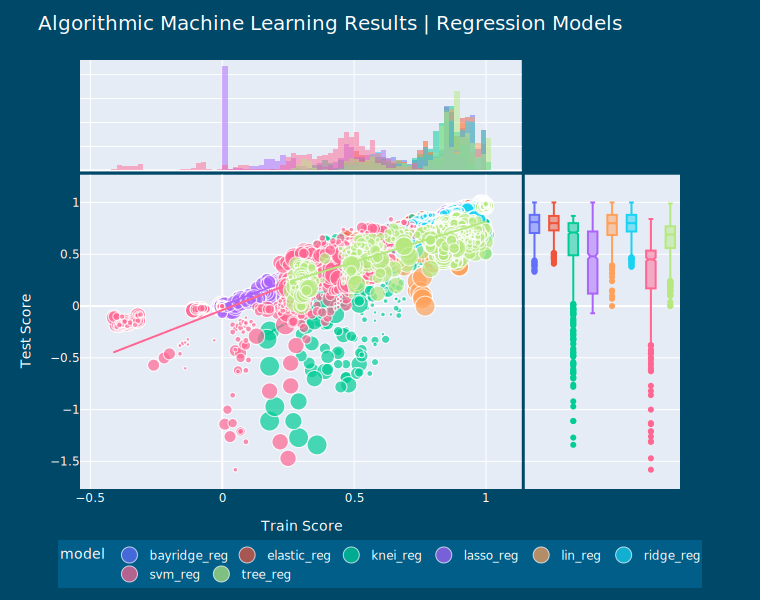

In [96]:
fig = px.scatter(res_reg_analysis_grp, x = "train_score", y = "test_score", marginal_x = "histogram", marginal_y = "box", 
           color = "model", size = "n_features", trendline = "ols", height = 600, width=760)

fig.update_layout(title = "Algorithmic Machine Learning Results | Regression Models", title_font = dict(size = 20, color = "white"),
                  paper_bgcolor = '#004868',
                  xaxis = dict(title = "Train Score", titlefont = dict(color = "white"), tickfont = dict(color = "white")),
                  yaxis = dict(title = "Test Score", titlefont = dict(color = "white"), tickfont = dict(color = "white")),                  
                  legend = dict(orientation = "h", x=0.5, y=-0.12, xanchor = "auto", itemsizing = "trace", 
                                bgcolor = "#005E88", itemdoubleclick = "toggleothers",
                                font = dict(color = "white")),
                 )

py.plot(fig, filename = "RegML_algo_results", auto_open = False)
fig.show("svg")

In [182]:
res_reg_analysis_grp.loc[res_reg_analysis_grp.coef > 0]

,ticker,model,coef,n_features,scaling,test_size_prop,train_score,test_score
0,AAPL,bayridge_reg,0.55,133,nosc,0.05,0.95,0.92
1,AAPL,bayridge_reg,0.55,133,nosc,0.10,0.94,0.93
2,AAPL,bayridge_reg,0.55,133,nosc,0.15,0.94,0.92
3,AAPL,bayridge_reg,0.55,133,nosc,0.20,0.94,0.92
4,AAPL,bayridge_reg,0.55,133,nosc,0.25,0.94,0.92
...,...,...,...,...,...,...,...,...
8283,SHEL.L,tree_reg,0.80,7,scStan,0.15,0.91,0.64
8284,SHEL.L,tree_reg,0.80,7,scStan,0.20,0.93,0.72
8285,SHEL.L,tree_reg,0.80,7,scStan,0.25,0.97,0.70
8286,SHEL.L,tree_reg,0.80,7,scStan,0.30,0.96,0.72


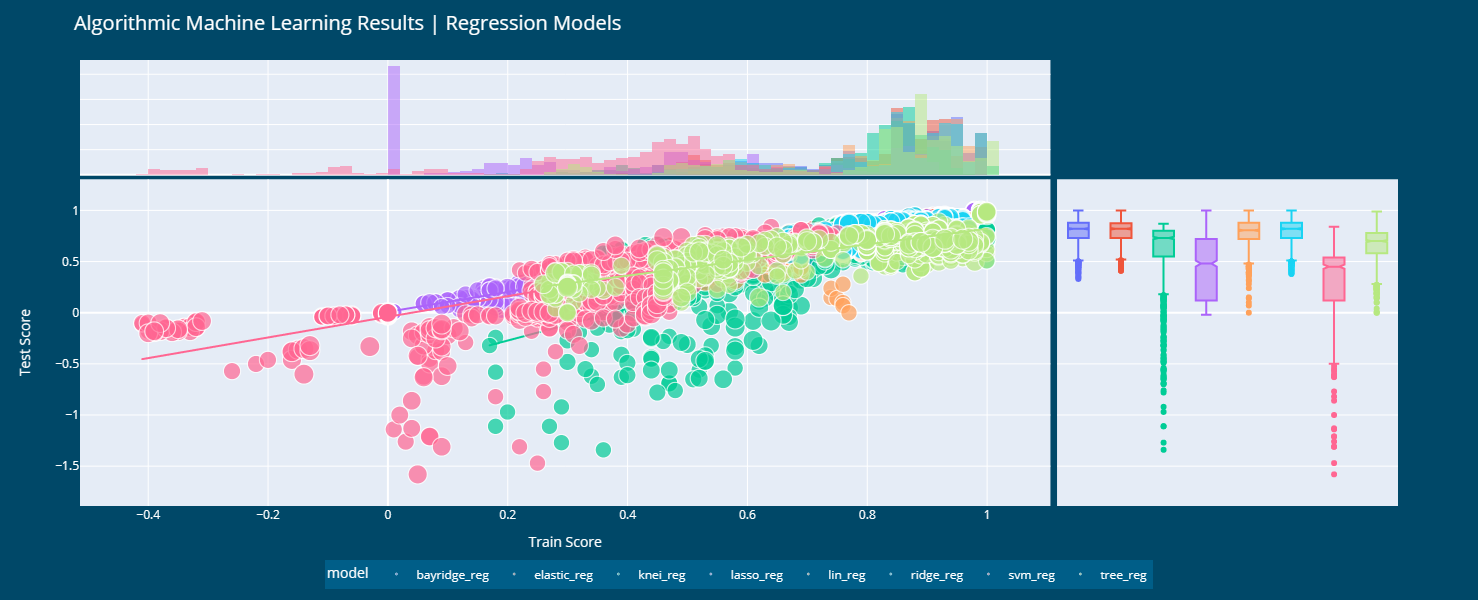

In [181]:
fig = px.scatter(res_reg_analysis_grp.loc[res_reg_analysis_grp.coef > 0], x = "train_score", y = "test_score", marginal_x = "histogram", marginal_y = "box", 
           color = "model", size = "coef", trendline = "ols", height = 600, width=760)

fig.update_layout(title = "Algorithmic Machine Learning Results | Regression Models", title_font = dict(size = 20, color = "white"),
                  paper_bgcolor = '#004868',
                  xaxis = dict(title = "Train Score", titlefont = dict(color = "white"), tickfont = dict(color = "white")),
                  yaxis = dict(title = "Test Score", titlefont = dict(color = "white"), tickfont = dict(color = "white")),                  
                  legend = dict(orientation = "h", x=0.5, y=-0.12, xanchor = "auto", itemsizing = "trace", 
                                bgcolor = "#005E88", itemdoubleclick = "toggleothers",
                                font = dict(color = "white")),
                 )

# py.plot(fig, filename = "RegML_algo_results2", auto_open = False)
# fig.show("svg")
fig.show()